# Dimensionality Reduction!



Remember in Classification, we worked with datasets composed of only two independent variables. We did for two reasons:

Because we needed two dimensions to visualize better how Machine Learning models worked (by plotting the prediction regions and the prediction boundary for each model).

Because whatever is the original number of our independent variables, we can often end up with two independent variables by applying an appropriate Dimensionality Reduction technique.



### There are two types of Dimensionality Reduction techniques:

- Feature Selection

- Feature Extraction



Feature Selection techniques are Backward Elimination, Forward Selection, Bidirectional Elimination, Score Comparison and more. We covered these techniques in Part 2 - Regression.

#### In this part we will cover the following Feature Extraction techniques:

Principal Component Analysis (PCA)

Linear Discriminant Analysis (LDA)

Kernel PCA

 Screen plotto find the elbow / optimum latent factors

 Another criterion is Kaiser criterion -- Eigen values > 1
 
 Factors Analysis : Rotation
     
         for interpretation of the data, it is better to rotate the factors as seen in example

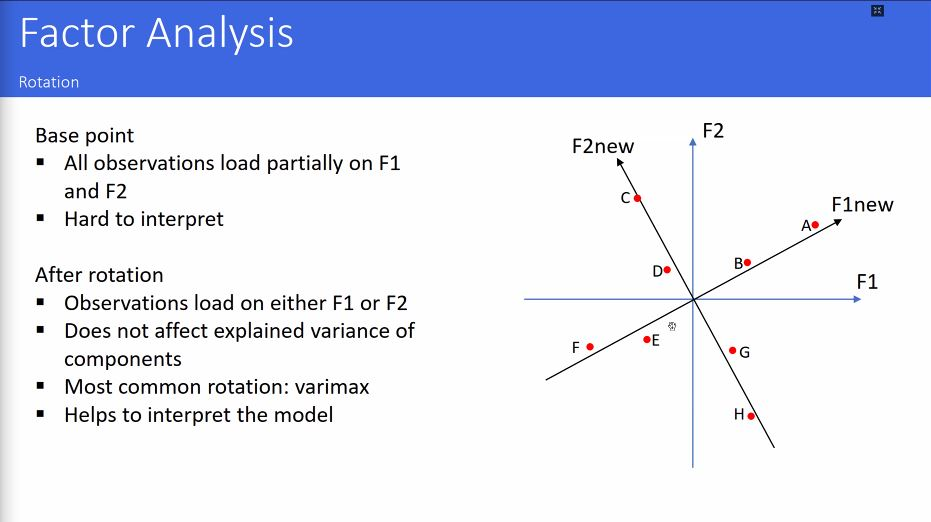

In [1]:
from IPython.display import Image
Image(filename='Factor Analysis - Rotation.JPG')

In [23]:
## Factor Analysis

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis

from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import Pipeline
from plotnine import ggplot, aes, geom_point,geom_line

In [24]:
iris = load_iris()
X = iris.data
y = iris.target

In [25]:
X.shape

(150, 4)

In [26]:
fa = FactorAnalysis(n_components=2)
fa.fit(X)

FactorAnalysis(n_components=2)

In [27]:
fa.noise_variance_

array([0.01609026, 0.09807659, 0.00405033, 0.04071555])

In [28]:


#modeling
steps = [
    ('scaler', StandardScaler()),
    ('fa', FactorAnalysis(n_components=2))
]

pipeline = Pipeline(steps)
factors = pipeline.fit_transform(X)

In [29]:
factors.shape

(150, 2)

In [30]:
mapping = {0:'setosa', 1:'versicolor', 2:'virginica'}
y_strings = [mapping[i] for i in y]
y_strings

['setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',


In [35]:
df = pd.DataFrame(factors, columns = ['factors1','factors2'])
df['species'] = y_strings
df

,factors1,factors2,species
0,-1.328255,-0.559732,setosa
1,-1.337759,-0.000107,setosa
2,-1.402517,0.307654,setosa
3,-1.300187,0.719597,setosa
4,-1.333781,-0.363828,setosa
...,...,...,...
145,0.843635,-0.540930,virginica
146,0.707527,0.247837,virginica
147,0.826590,-0.133065,virginica
148,0.923642,0.630654,virginica


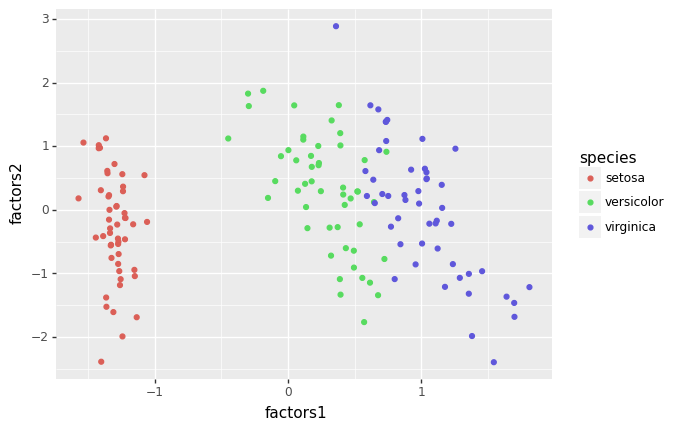

<ggplot: (126578213608)>

In [36]:
(ggplot(df) + aes(x='factors1', y='factors2', color='species') + geom_point())

## Principal Compoment Analysis

idea is that two observations farthest together from each other define the first axis
the secon one is 90 degrees to the first and the third is 90 degress to the first two



